# Merge sort

In [1]:
import math
import numpy as np
import pylab as pl
import random as rnd
import time
%matplotlib inline

In [2]:
def mergeSort(alist):
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] <= righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1


In [3]:
B = np.random.permutation(range(0,10))
A = list(B)
print A
mergeSort(A)
print A

[6, 4, 2, 1, 9, 7, 0, 8, 3, 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Análisis experimental

In [4]:
class Counter:
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps


In [5]:
def acctMergeSort(alist, acct):
    if len(alist)>1:
        acct.count()
        mid = len(alist)//2;acct.count()
        lefthalf = alist[:mid];acct.count()
        righthalf = alist[mid:];acct.count()

        acctMergeSort(lefthalf,acct); acct.count()
        acctMergeSort(righthalf,acct); acct.count()

        i=0; acct.count()
        j=0; acct.count()
        k=0; acct.count()
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()
            if lefthalf[i] <= righthalf[j]:
                acct.count()
                alist[k]=lefthalf[i]; acct.count()
                i=i+1;acct.count()
            else:
                acct.count()
                alist[k]=righthalf[j];acct.count()
                j=j+1;acct.count()
            k=k+1;acct.count()
        acct.count()
        while i < len(lefthalf):
            acct.count()
            alist[k]=lefthalf[i]; acct.count()
            i=i+1; acct.count()
            k=k+1; acct.count()
        acct.count()
        while j < len(righthalf):
            acct.count()
            alist[k]=righthalf[j]; acct.count()
            j=j+1; acct.count()
            k=k+1; acct.count()
        acct.count()

In [6]:
B = np.random.permutation(range(0,10))
A = list(B)
print A
acct = Counter()
acctMergeSort(A,acct)
print A
acct.print_steps()

[5, 8, 9, 0, 4, 7, 6, 1, 2, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Number of steps = 266


In [7]:
def exper_analysisS(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        C =list(l)
        acct.reset()
        acctMergeSort(C, acct)
        results.append(acct.steps)
    return results

In [8]:
def exper_analysisT(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        C =list(l)
        tic = time.clock()
        mergeSort(C)
        toc = time.clock()
        results.append((toc-tic)*500000)
    return results

In [9]:
def exper_analysisR(n):
    results = []
    acct = Counter()
    for i in range(n):
        l=0
        if i > 1:
            l = i * math.log(i,2)
        results.append(l)
    return results

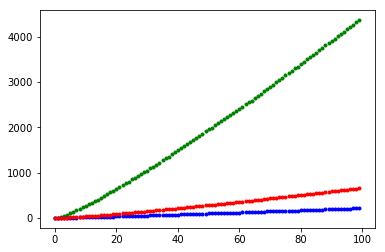

In [10]:
pl.clf()
x = np.arange(100)
y1 = np.array(exper_analysisS(100))
y2= np.array(exper_analysisT(100))
y3 = np.array(exper_analysisR(100))
pl.plot(x, y1, 'g.', x, y2, 'b.', x, y3, 'r.')